In [3]:
import numpy as np
import pandas as pd
import torch

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


%matplotlib qt
%matplotlib inline 

In [5]:
datapath = "../Data/embed_solo_output.csv"
df = pd.read_csv(datapath)
df.head()

,Unnamed: 0.1,Unnamed: 0,sub_id,groupID,studyID,group_cond,trial,img,txt,clean_text,...,embed758,embed759,embed760,embed761,embed762,embed763,embed764,embed765,embed766,embed767
0,0,1,A1R0DIJHIE1LOC,4,id-thggi-2996,reapp,14,18,2 boys are using a fence to shield them,boys are using a fence to shield them,...,0.248083,0.699419,0.227834,0.784158,0.262494,0.560884,0.355100,0.429491,-0.645035,0.881308
1,1,2,A21VSWO39YO5KM,2,id-fjoxq-3000,reapp,19,18,2 children with dirt all over them. Not sure ...,children with dirt all over them not sure what...,...,0.351598,0.145989,0.955823,0.540921,0.170202,-0.055988,0.486051,-0.492136,-0.660291,0.831831
2,2,3,A7A7V8W9I0LFN,3,id-uwffo-26,control,15,15,2 hasmack workers are searching for dead bodie...,hasmack workers are searching for dead bodies ...,...,0.249377,0.339948,-0.039549,0.714368,0.610873,0.694598,0.283590,0.565000,-0.480273,0.706082
3,3,4,A86NUIKRVDWDF,9,id-eiwzx-3000,reapp,3,18,2 kids covered in ash or soot,kids covered in ash or soot,...,0.124746,-0.523089,0.966697,0.558347,-0.216280,0.408792,0.369208,-0.628226,-0.660217,0.815696
4,4,5,A2615YW1YERQBO,2,id-giakt-2999,reapp,2,18,2 kids playing hooky.,kids playing hooky,...,0.099838,-0.177925,0.978158,0.758012,-0.018954,0.073469,0.306579,-0.667032,-0.720221,0.927441


In [7]:
df["labels"] = ""
df.loc[df["group_cond"] == "control", "labels"] = 0
df.loc[df["group_cond"] == "reapp", "labels"] = 1

df = df[df['labels'].isin([0, 1])]
df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
df.head()

,sub_id,groupID,studyID,group_cond,trial,img,txt,clean_text,num,embed0,...,embed759,embed760,embed761,embed762,embed763,embed764,embed765,embed766,embed767,labels
0,A1R0DIJHIE1LOC,4,id-thggi-2996,reapp,14,18,2 boys are using a fence to shield them,boys are using a fence to shield them,0,-0.838777,...,0.699419,0.227834,0.784158,0.262494,0.560884,0.355100,0.429491,-0.645035,0.881308,1
1,A21VSWO39YO5KM,2,id-fjoxq-3000,reapp,19,18,2 children with dirt all over them. Not sure ...,children with dirt all over them not sure what...,1,-0.670847,...,0.145989,0.955823,0.540921,0.170202,-0.055988,0.486051,-0.492136,-0.660291,0.831831,1
2,A7A7V8W9I0LFN,3,id-uwffo-26,control,15,15,2 hasmack workers are searching for dead bodie...,hasmack workers are searching for dead bodies ...,2,-0.700286,...,0.339948,-0.039549,0.714368,0.610873,0.694598,0.283590,0.565000,-0.480273,0.706082,0
3,A86NUIKRVDWDF,9,id-eiwzx-3000,reapp,3,18,2 kids covered in ash or soot,kids covered in ash or soot,3,-0.744106,...,-0.523089,0.966697,0.558347,-0.216280,0.408792,0.369208,-0.628226,-0.660217,0.815696,1
4,A2615YW1YERQBO,2,id-giakt-2999,reapp,2,18,2 kids playing hooky.,kids playing hooky,4,-0.859633,...,-0.177925,0.978158,0.758012,-0.018954,0.073469,0.306579,-0.667032,-0.720221,0.927441,1


In [9]:
# combine all embeddings colunms to 1 vector
embed_columns = [f'embed{i}' for i in range(768)]
df['combined_embed'] = df[embed_columns].apply(lambda row: row.tolist(), axis=1)
df.drop(embed_columns, axis=1, inplace=True)
df.head()


,sub_id,groupID,studyID,group_cond,trial,img,txt,clean_text,num,labels,combined_embed
0,A1R0DIJHIE1LOC,4,id-thggi-2996,reapp,14,18,2 boys are using a fence to shield them,boys are using a fence to shield them,0,1,"[-0.8387765288352966, -0.2558120489120483, 0.0..."
1,A21VSWO39YO5KM,2,id-fjoxq-3000,reapp,19,18,2 children with dirt all over them. Not sure ...,children with dirt all over them not sure what...,1,1,"[-0.6708473563194275, -0.4387005567550659, -0...."
2,A7A7V8W9I0LFN,3,id-uwffo-26,control,15,15,2 hasmack workers are searching for dead bodie...,hasmack workers are searching for dead bodies ...,2,0,"[-0.7002859711647034, -0.1465404778718948, 0.3..."
3,A86NUIKRVDWDF,9,id-eiwzx-3000,reapp,3,18,2 kids covered in ash or soot,kids covered in ash or soot,3,1,"[-0.744105875492096, -0.3532766699790954, -0.8..."
4,A2615YW1YERQBO,2,id-giakt-2999,reapp,2,18,2 kids playing hooky.,kids playing hooky,4,1,"[-0.8596329092979431, -0.3974953293800354, -0...."


# Random forest classification (with default hyper prarameters)

In [19]:

# Prepare the data
X = np.vstack(df['combined_embed'].values)  # Convert the lists of embeddings to a 2D numpy array
y = df['labels'].values  # Get the labels as a 1D numpy array

y = y.astype(str)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


## Fine Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the base Random Forest model
base_model = RandomForestClassifier(random_state=42)

# Create the Grid Search cross-validator
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the Grid Search cross-validator on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Train the Random Forest classifier with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

,Unnamed: 0.1,Unnamed: 0,sub_id,groupID,studyID,subgrp,group_cond,grp_goal,grp_method,trial,...,embed758,embed759,embed760,embed761,embed762,embed763,embed764,embed765,embed766,embed767
0,0,1,AZLX0OGFF8UQ1,id-eiwzx-2997-14,id-eiwzx-2997,treatment,reapp_target,motivated,reappraisal,15,...,0.172390,-0.028801,-0.027799,0.771038,0.262356,0.697935,0.349265,0.396090,-0.462402,0.733836
1,1,2,A2BZSAELJE8Z3,id-ngahz-2998-3,id-ngahz-2998,treatment,target,motivated,observing,8,...,0.365448,0.441506,0.226436,0.831011,0.233498,0.653101,0.428154,0.326565,-0.543720,0.884477
2,2,3,A2J2SUYN1P96HB,id-zrcsw-2997-2,id-zrcsw-2997,treatment,reapp_target,motivated,reappraisal,19,...,0.727991,-0.574286,0.998697,0.881759,-0.798179,-0.250414,0.824731,-0.956668,-0.741965,0.955225
3,3,4,AB0ID12VC6ZW6,id-uwffo-18-1,id-uwffo-18,control,target,motivated,observing,2,...,0.726267,-0.315276,0.936004,0.874975,-0.574925,0.206210,0.774138,-0.705324,-0.663725,0.923133
4,4,5,A39BIGZ0L59WLV,id-uwffo-13-5,id-uwffo-13,treatment,target,motivated,observing,13,...,0.290169,0.138014,0.444912,0.859991,0.346135,0.658951,0.434719,0.234517,-0.591948,0.850707


### OK, the fine tunning results showed that  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}  is the best parameter set

In [23]:
test_df = pd.read_csv("../Data/embed_output.csv")
test_df.head()

,Unnamed: 0.1,Unnamed: 0,sub_id,groupID,studyID,subgrp,group_cond,grp_goal,grp_method,trial,...,embed758,embed759,embed760,embed761,embed762,embed763,embed764,embed765,embed766,embed767
0,0,1,AZLX0OGFF8UQ1,id-eiwzx-2997-14,id-eiwzx-2997,treatment,reapp_target,motivated,reappraisal,15,...,0.172390,-0.028801,-0.027799,0.771038,0.262356,0.697935,0.349265,0.396090,-0.462402,0.733836
1,1,2,A2BZSAELJE8Z3,id-ngahz-2998-3,id-ngahz-2998,treatment,target,motivated,observing,8,...,0.365448,0.441506,0.226436,0.831011,0.233498,0.653101,0.428154,0.326565,-0.543720,0.884477
2,2,3,A2J2SUYN1P96HB,id-zrcsw-2997-2,id-zrcsw-2997,treatment,reapp_target,motivated,reappraisal,19,...,0.727991,-0.574286,0.998697,0.881759,-0.798179,-0.250414,0.824731,-0.956668,-0.741965,0.955225
3,3,4,AB0ID12VC6ZW6,id-uwffo-18-1,id-uwffo-18,control,target,motivated,observing,2,...,0.726267,-0.315276,0.936004,0.874975,-0.574925,0.206210,0.774138,-0.705324,-0.663725,0.923133
4,4,5,A39BIGZ0L59WLV,id-uwffo-13-5,id-uwffo-13,treatment,target,motivated,observing,13,...,0.290169,0.138014,0.444912,0.859991,0.346135,0.658951,0.434719,0.234517,-0.591948,0.850707


In [25]:
# combine all embeddings colunms to 1 vector
embed_columns = [f'embed{i}' for i in range(768)]
test_df['combined_embed'] = test_df[embed_columns].apply(lambda row: row.tolist(), axis=1)
test_df.drop(embed_columns, axis=1, inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,sub_id,groupID,studyID,subgrp,group_cond,grp_goal,grp_method,trial,img,txt,clean_text,num,combined_embed
0,0,1,AZLX0OGFF8UQ1,id-eiwzx-2997-14,id-eiwzx-2997,treatment,reapp_target,motivated,reappraisal,15,11,"'Raging Bull' (1981), Rob DeNi",raging bull rob deni,0,"[-0.7272793650627136, -0.2910129725933075, 0.2..."
1,1,2,A2BZSAELJE8Z3,id-ngahz-2998-3,id-ngahz-2998,treatment,target,motivated,observing,8,18,... What the hell have you been rollingi,what the hell have you been rollingi,1,"[-0.8333132266998291, -0.1627711653709411, 0.3..."
2,2,3,A2J2SUYN1P96HB,id-zrcsw-2997-2,id-zrcsw-2997,treatment,reapp_target,motivated,reappraisal,19,1,...I don't like babies and am very upset by th...,i dont like babies and am very upset by this i...,2,"[-0.9250608086586, -0.6080515384674072, -0.995..."
3,3,4,AB0ID12VC6ZW6,id-uwffo-18-1,id-uwffo-18,control,target,motivated,observing,2,19,...that's gotta hurt.,thats gotta hurt,3,"[-0.8942626714706421, -0.4042907655239105, -0...."
4,4,5,A39BIGZ0L59WLV,id-uwffo-13-5,id-uwffo-13,treatment,target,motivated,observing,13,15,100 percent a photo from a movie.,percent a photo from a movie,4,"[-0.8474165797233582, -0.2942624688148498, 0.2..."


In [27]:

# train the classifier on solo data
best_model = RandomForestClassifier(n_estimators=200, max_depth = 20, min_samples_split = 10, min_samples_leaf = 1, bootstrap = False, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [33]:
X_test_group = np.vstack(test_df['combined_embed'].values)

test_df['label_pred'] = best_model.predict(X_test_group)

test_df.to_csv('../Data/RF_classifier_output.csv', index = False)

### We want to see the % of reappraisal in both solo and group data
#### In the solo data

In [46]:
y_pred = best_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)  # Adjust labels as necessary

true_control, false_reappraisal, false_control, true_reappraisal = cm.ravel()

# For observations with an actual label of reappraisal
num_reappraisal_predicted_as_reappraisal = true_reappraisal
percentage_reappraisal_predicted_as_reappraisal = (true_reappraisal / (true_reappraisal + false_control)) * 100

# For observations with an actual label of control
num_control_predicted_as_reappraisal = false_reappraisal
percentage_control_predicted_as_reappraisal = (false_reappraisal / (true_control + false_reappraisal)) * 100

print(f'Out of the actual reappraisal observations, {num_reappraisal_predicted_as_reappraisal} were predicted as reappraisal, which is {percentage_reappraisal_predicted_as_reappraisal:.2f}% of them.')
print(f'Out of the actual control observations, {num_control_predicted_as_reappraisal} were predicted as reappraisal, which is {percentage_control_predicted_as_reappraisal:.2f}% of them.')

accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')

Out of the actual reappraisal observations, 1095 were predicted as reappraisal, which is 85.02% of them.
Out of the actual control observations, 336 were predicted as reappraisal, which is 29.73% of them.
Overall Accuracy: 0.78


#### In the group data

In [ ]:
y_pred_group = best_model.predict(X_test_group)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_group)  # Adjust labels as necessary

true_control, false_reappraisal, false_control, true_reappraisal = cm.ravel()

# For observations with an actual label of reappraisal
num_reappraisal_predicted_as_reappraisal = true_reappraisal
percentage_reappraisal_predicted_as_reappraisal = (true_reappraisal / (true_reappraisal + false_control)) * 100

# For observations with an actual label of control
num_control_predicted_as_reappraisal = false_reappraisal
percentage_control_predicted_as_reappraisal = (false_reappraisal / (true_control + false_reappraisal)) * 100

print(f'Out of the actual reappraisal observations, {num_reappraisal_predicted_as_reappraisal} were predicted as reappraisal, which is {percentage_reappraisal_predicted_as_reappraisal:.2f}% of them.')
print(f'Out of the actual control observations, {num_control_predicted_as_reappraisal} were predicted as reappraisal, which is {percentage_control_predicted_as_reappraisal:.2f}% of them.')

accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.2f}')

### Treatment subgroup analysis

In [153]:
test_df = pd.read_csv("../Data/RF_classifier_output.csv")

In [154]:
df_treat = test_df[(test_df['subgrp'] == 'treatment')]
df_treat = df_treat[['grp_method', 'grp_goal', 'label_pred']]
summary_treat = df_treat.groupby(['grp_method', 'grp_goal']).value_counts().reset_index(name='count')
print(summary_treat)

    grp_method       grp_goal  label_pred  count
0    observing      motivated           1   2437
1    observing      motivated           0   1490
2  reappraisal      motivated           1   2378
3  reappraisal      motivated           0    551
4  reappraisal  non_motivated           1   2601
5  reappraisal  non_motivated           0    680


In [157]:
df_treat.head()

,grp_method,grp_goal,label_pred
0,reappraisal,motivated,1
1,observing,motivated,0
2,reappraisal,motivated,0
4,observing,motivated,1
5,observing,motivated,1


In [159]:
# Calculate group totals
group_totals = summary_treat.groupby(['grp_method', 'grp_goal'])['count'].sum().reset_index(name='total')

# Merge summary with group_totals
summary_treat = summary_treat.merge(group_totals, on=['grp_method', 'grp_goal'])

# Calculate percentages
summary_treat['percentage'] = summary_treat['count'] / summary_treat['total'] * 100

# Print the result
print(summary_treat)


    grp_method       grp_goal  label_pred  count  total  percentage
0    observing      motivated           1   2437   3927   62.057550
1    observing      motivated           0   1490   3927   37.942450
2  reappraisal      motivated           1   2378   2929   81.188119
3  reappraisal      motivated           0    551   2929   18.811881
4  reappraisal  non_motivated           1   2601   3281   79.274611
5  reappraisal  non_motivated           0    680   3281   20.725389


In [161]:
# Trial level analysis
df_treat_trial = test_df[(test_df['subgrp'] == 'treatment') | (test_df['group_cond'] == 'control')]

df_treat_trial = df_treat_trial[['group_cond', 'trial', 'label_pred']]

summary_treat_trial = df_treat_trial.groupby(['group_cond', 'trial']).value_counts().reset_index(name='count')

# Calculate group totals
group_totals = summary_treat_trial.groupby(['group_cond', 'trial'])['count'].sum().reset_index(name='total')

# Merge summary with group_totals
summary_treat_trial = summary_treat_trial.merge(group_totals, on=['group_cond', 'trial'])

# Calculate percentages
summary_treat_trial['percentage'] = summary_treat_trial['count'] / summary_treat_trial['total'] * 100

# Print the result
print(summary_treat_trial[summary_treat_trial['label_pred'] == 1])

    group_cond  trial  label_pred  count  total  percentage
1      control      1           1    152    390   38.974359
3      control      2           1    119    401   29.675810
5      control      3           1    178    395   45.063291
7      control      4           1    174    395   44.050633
9      control      5           1    174    392   44.387755
..         ...    ...         ...    ...    ...         ...
150     target     16           1    127    191   66.492147
152     target     17           1    131    193   67.875648
154     target     18           1    114    192   59.375000
156     target     19           1    117    190   61.578947
158     target     20           1    123    193   63.730570

[80 rows x 6 columns]


/Users/ycao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ycao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ycao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


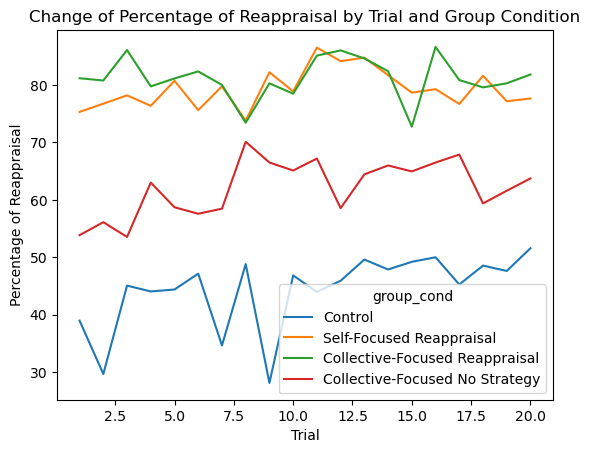

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

new_labels = {'reapp': 'Self-Focused Reappraisal', 'reapp_target': 'Collective-Focused Reappraisal', 'target': 'Collective-Focused No Strategy', 'control': 'Control'}
summary_treat_trial['group_cond'] = summary_treat_trial['group_cond'].astype('category').cat.rename_categories(new_labels)

sns.lineplot(data=summary_treat_trial[summary_treat_trial['label_pred'] == 1], x='trial', y='percentage', hue='group_cond')
plt.title('Change of Percentage of Reappraisal by Trial and Group Condition')
plt.xlabel('Trial')
plt.ylabel('Percentage of Reappraisal')

# Show the plot
plt.show()


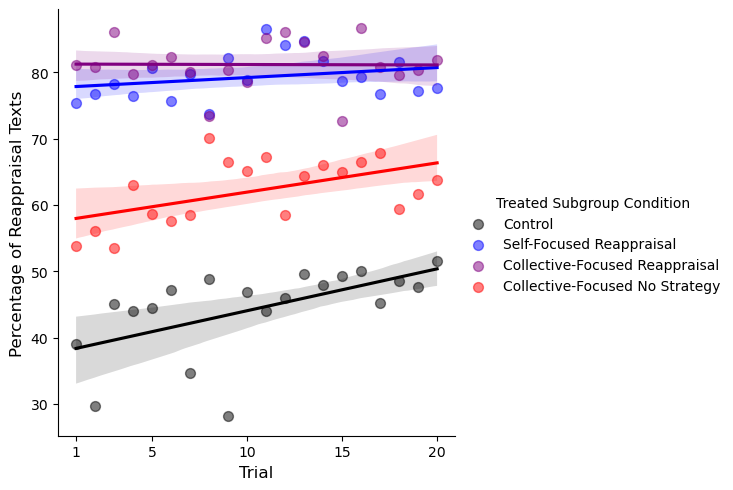

In [165]:


custom_palette = {"Control": "black", "Self-Focused Reappraisal": "blue", 
                  "Collective-Focused Reappraisal": "purple", "Collective-Focused No Strategy": "red"}


plot = sns.lmplot(data=summary_treat_trial[summary_treat_trial['label_pred'] == 1], 
                  x='trial', y='percentage', hue='group_cond', scatter_kws={'s': 50, 'alpha': 0.5},
                 palette=custom_palette)
plot._legend.set(title='Treated Subgroup Condition')

#plt.title('Percentage of Reappraisal by Trial and Group Condition')

# Set x-axis ticks and labels
plt.xticks([1, 5, 10, 15, 20], fontsize=10)
plt.xlabel('Trial', fontsize=12) 

# Set y-axis label and tick font size
plt.yticks(fontsize=10)
plt.ylabel('Percentage of Reappraisal Texts', fontsize=12) 



# Set a white background
plt.gca().set_facecolor('white')

# Show the plot
plt.show()


plot.savefig('../Figures/RF_classifier_outcomes.png')

In [167]:
# Stats tests
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Reaprpaisal percentage difference between conditions 
from scipy.stats import ttest_ind

percentage_dat = summary_treat_trial[summary_treat_trial['label_pred'] == 1]

reapp = percentage_dat[percentage_dat['group_cond'].isin(['Self-Focused Reappraisal', 'Collective-Focused Reappraisal'])]['percentage']

non_reapp = percentage_dat[percentage_dat['group_cond'].isin(['Collective-Focused No Strategy', 'Control'])]['percentage']

ttest_ind(reapp, non_reapp, equal_var=False)


TtestResult(statistic=15.163826339512807, pvalue=6.716117391763594e-20, df=47.83573233814686)

In [175]:
# Did Collecitve No strategy people increase their reappraisal overtime?
model = smf.ols('percentage ~ trial', data=percentage_dat[percentage_dat['group_cond'] == 'Collective-Focused No Strategy']).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     7.347
Date:                Tue, 25 Mar 2025   Prob (F-statistic):             0.0143
Time:                        15:36:23   Log-Likelihood:                -55.998
No. Observations:                  20   AIC:                             116.0
Df Residuals:                      18   BIC:                             118.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.5256      1.948     29.527      0.0

In [173]:
non_reapp

1      38.974359
3      29.675810
5      45.063291
7      44.050633
9      44.387755
11     47.150259
13     34.645669
15     48.812665
17     28.125000
19     46.842105
21     43.979058
23     45.910290
25     49.604222
27     47.872340
29     49.210526
31     50.000000
33     45.263158
35     48.548813
37     47.619048
38     51.578947
120    53.846154
122    56.108597
124    53.535354
126    63.000000
128    58.706468
130    57.575758
132    58.461538
134    70.103093
136    66.494845
138    65.104167
140    67.187500
142    58.549223
144    64.432990
146    65.979381
148    64.948454
150    66.492147
152    67.875648
154    59.375000
156    61.578947
158    63.730570
Name: percentage, dtype: float64

In [ ]:
# Take three random people in the control subgroup and add its line to the graph
# Corr between percentage of reapp within groups ~ negative emotions

### Control subgroup analysis

In [18]:
df_control = test_df[(test_df['subgrp'] == 'control')]
df_control = df_control[['grp_method', 'grp_goal', 'label_pred']]
summary_control = df_control.groupby(['grp_method', 'grp_goal']).value_counts().reset_index(name='count')
print(summary_control)

    grp_method       grp_goal  label_pred  count
0    observing      motivated           1   2600
1    observing      motivated           2   1751
2    observing  non_motivated           1   4311
3    observing  non_motivated           2   3365
4  reappraisal      motivated           1   1681
5  reappraisal      motivated           2   1343
6  reappraisal  non_motivated           1   2094
7  reappraisal  non_motivated           2   1378


In [19]:
# Calculate group totals
group_totals = summary_control.groupby(['grp_method', 'grp_goal'])['count'].sum().reset_index(name='total')

# Merge summary with group_totals
summary_control = summary_control.merge(group_totals, on=['grp_method', 'grp_goal'])

# Calculate percentages
summary_control['percentage'] = summary_control['count'] / summary_control['total'] * 100

# Print the result
print(summary_control)


    grp_method       grp_goal  label_pred  count  total  percentage
0    observing      motivated           1   2600   4351   59.756378
1    observing      motivated           2   1751   4351   40.243622
2    observing  non_motivated           1   4311   7676   56.162064
3    observing  non_motivated           2   3365   7676   43.837936
4  reappraisal      motivated           1   1681   3024   55.588624
5  reappraisal      motivated           2   1343   3024   44.411376
6  reappraisal  non_motivated           1   2094   3472   60.311060
7  reappraisal  non_motivated           2   1378   3472   39.688940


In [20]:
# Trial level analysis
df_control_trial = test_df[(test_df['subgrp'] == 'control')]

df_control_trial = df_control_trial[['group_cond', 'trial', 'label_pred']]

summary_control_trial = df_control_trial.groupby(['group_cond', 'trial']).value_counts().reset_index(name='count')

# Calculate group totals
group_totals = summary_control_trial.groupby(['group_cond', 'trial'])['count'].sum().reset_index(name='total')

# Merge summary with group_totals
summary_control_trial = summary_control_trial.merge(group_totals, on=['group_cond', 'trial'])

# Calculate percentages
summary_control_trial['percentage'] = summary_control_trial['count'] / summary_control_trial['total'] * 100

# Print the result
print(summary_control_trial[summary_control_trial['label_pred'] == 2])

    group_cond  trial  label_pred  count  total  percentage
1      control      1           2    160    390   41.025641
3      control      2           2    126    401   31.421446
5      control      3           2    184    395   46.582278
7      control      4           2    167    395   42.278481
9      control      5           2    167    392   42.602041
..         ...    ...         ...    ...    ...         ...
151     target     16           2     95    214   44.392523
153     target     17           2     93    214   43.457944
155     target     18           2     91    214   42.523364
157     target     19           2     95    212   44.811321
159     target     20           2     87    212   41.037736

[80 rows x 6 columns]


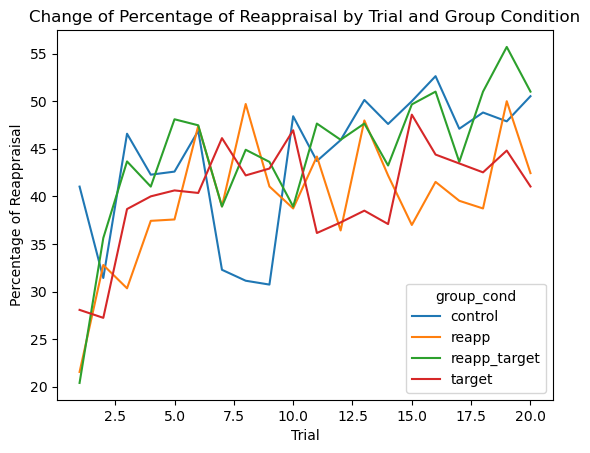

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=summary_control_trial[summary_control_trial['label_pred'] == 2], x='trial', y='percentage', hue='group_cond')
plt.title('Change of Percentage of Reappraisal by Trial and Group Condition')
plt.xlabel('Trial')
plt.ylabel('Percentage of Reappraisal')

# Show the plot
plt.show()


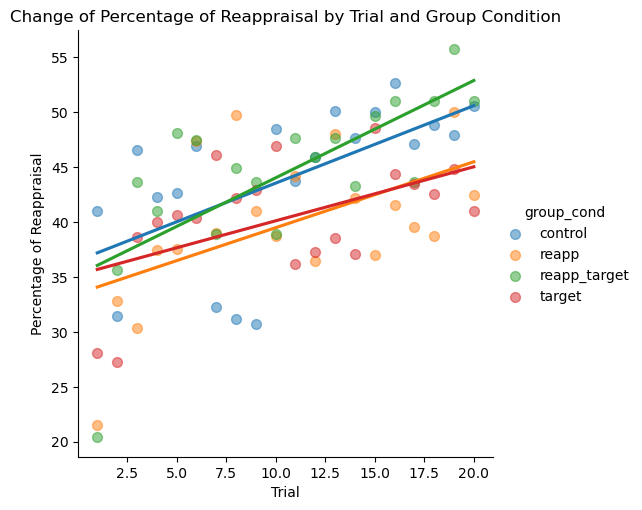

In [22]:

sns.lmplot(data=summary_control_trial[summary_control_trial['label_pred'] == 2], x='trial', y='percentage',
           hue='group_cond', scatter_kws={'s': 50, 'alpha': 0.5}, ci=None)
plt.title('Change of Percentage of Reappraisal by Trial and Group Condition')
plt.xlabel('Trial')
plt.ylabel('Percentage of Reappraisal')

# Show the plot
plt.show()

In [ ]:
# Smilarity between control and treat subgroup by consine similirty on projection

In [36]:
summary_control_trial['trial_half'] = summary_control_trial['trial'].apply(lambda x: 'First 10' if x <= 10 else 'Last 10')

# Calculate the average percentage for each group
grouped_control_trial = summary_control_trial.groupby(['group_cond', 'trial_half'])['percentage'].mean()

# Create the bar chart
sns.barplot(data=grouped_control_trial, x='group_cond', y='percentage', hue='trial_half')


ValueError: Could not interpret input 'group_cond'

In [41]:
summary_control_trial['percentage']

0      58.974359
1      41.025641
2      68.578554
3      31.421446
4      53.417722
         ...    
155    42.523364
156    55.188679
157    44.811321
158    58.962264
159    41.037736
Name: percentage, Length: 160, dtype: float64